# The Reuters corpus

## Question: Are there patterns in each author's work, and what are they?

### Objective:
The primary goal of this project was to explore and identify patterns in the works of different authors in the Reuters corpus. We aimed to determine whether distinct patterns exist in individual authors' texts and, if so, to characterize these patterns using various text analysis and clustering techniques.

### Approach: 
* **Preprocessing**: 
    * Text data from the Reuters corpus was tokenized, stemmed, and cleaned by removing stop words and punctuation. This preprocessing step ensured that the resulting dataset was suitable for further analysis.
    * Both training and test datasets were combined because we are not running a predictive model but rather discovering patterns.
* **Word Plots:**
    * Frequency distributions and word clouds were generated for each author to visualize the most common words in their texts.
    * Notable patterns were that each author had a specialty, but there are larger categories and industries that they belong to.
* **Dimension Reduction: PCA and t-SNE:**
    * *PCA*: Principal Component Analysis (PCA) was optimized on accurace and used to reduce the dimensionality of the term-document matrix, making it easier to visualize and cluster the data.
    * *t-SNE*: t-SNE was applied to the PCA data to further reduce the dimensionality to 2D for visualization purposes, allowing us to explore the relationships between texts in a more interpretable way.
* **K-Means Clustering on PCA and t-SNE:**
    * K-Means clustering was performed on PCA and t-SNE to group similar texts together. This approach was primarily exploratory and aimed at visualizing the clusters, and we ran the model on 100 clusters. We were able to create some hypotheses for future exploration.
    * Clustering accuracy was measured by comparing the predicted clusters against the actual author labels.
* **Run Dimension Reduction and K-Means Clustering on TF-IDF data:**
    * The same above two steps were run on TF-IDF data. The TfidfVectorizer was used to convert the text data into a TF-IDF weighted document-term matrix. This matrix captures the frequency and importance of each word across all documents, allowing for meaningful comparisons between texts. 
    * In considering the weights through TF-IDF transformation, greater distinction between authors can be found.

### Results:
* **Accuracy Comparison:**
    * The accuracy of clustering using t-SNE (2D) was compared to clustering using PCA (1500 components, found with a approximately 90% threshold). The t-SNE clustering generally showed higher accuracy, suggesting that the t-SNE reduction captured more meaningful patterns in the text data for clustering purposes. 
    * The TF-IDF-transformed PCA and t-SNE clustering performed better on both fronts.
    * The TF-IDF t-SNE clustering performed the best with an accuracy at 51%.
* **Clustering Patterns:**
    * The K-Means clustering revealed that while there is a large central cluster containing a mix of authors, there are smaller, more distinct clusters for certain authors.
    * (Further interesting findings can be found at the bottom of this file, adjacent to our final visualization.)

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Preprocessing

In [3]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/jkchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer

nltk.download('punkt') # for tokenizing

# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        if os.path.isdir(author_path):  # Check if it's a directory
            for file_name in os.listdir(author_path):
                file_path = os.path.join(author_path, file_name)
                if file_name.endswith('.txt'):  # Make sure it's a text file
                    try:
                        with open(file_path, 'r', encoding='utf-8') as f:
                            texts.append(f.read())
                            labels.append(author)
                    except Exception as e:
                        print(f"Error reading {file_path}: {e}")
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("ReutersC50/C50test")

print(f"Number of training examples: {len(train_texts)}")
print(f"Number of test examples: {len(test_texts)}")

[nltk_data] Downloading package punkt to /Users/jkchen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of training examples: 2500
Number of test examples: 2500


In [5]:
# Combine the training and test data
texts = train_texts + test_texts
labels = train_labels + test_labels

print(len(train_texts), len(train_labels))
print(len(test_texts), len(test_labels))
print(len(texts), len(labels))

2500 2500
2500 2500
5000 5000


In [6]:
# Check if there are empty lists
print(len([i for i in texts if i == '']))
print(len([i for i in labels if i == '']))

0
0


In [7]:
word_tokenize(texts[0])[:5]

['Drugstore', 'giant', 'Revco', 'D.S', '.']

In [8]:
#Download the stopwords and tokenize the text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text.lower())

    punctuation = set(string.punctuation)
    punctuation.add('--')
    punctuation.add('``')
    punctuation.add('\'\'')
    
    # Remove punctuation
    tokens = [token for token in tokens if token not in punctuation and token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jkchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Basic Statistics
print(f"Total number of documents: {len(texts)}")

doc_lengths = [len(preprocess_text(text)) for text in texts]

print(f"\nAverage document length: {np.mean(doc_lengths)} words")
print(f"Minimum document length: {np.min(doc_lengths)} words")
print(f"Maximum document length: {np.max(doc_lengths)} words")

Total number of documents: 5000

Average document length: 318.467 words
Minimum document length: 33 words
Maximum document length: 927 words


## Word Clouds

Identifying the common words

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Most common words:
said: 39982
's: 30191
year: 12117
compani: 10997
percent: 10762
would: 10350
million: 10004
market: 9196
analyst: 7822
share: 6999


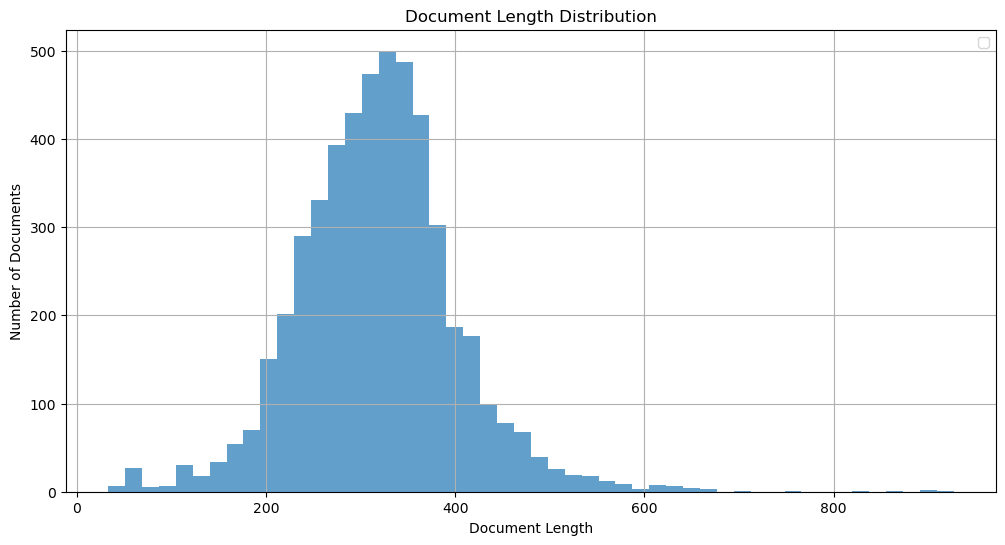

In [19]:
# Term Frequencies
all_tokens = [token for text in texts for token in preprocess_text(text)]
common_tokens = Counter(all_tokens).most_common(10)
print("\nMost common words:")
for token, freq in common_tokens:
    print(f"{token}: {freq}")

# Document Length Distribution
plt.figure(figsize=(12, 6))
plt.hist(doc_lengths, bins=50, alpha=0.7)
plt.title('Document Length Distribution')
plt.xlabel('Document Length')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

Identifying the top 10 common words for every author in the dataset

In [23]:
from nltk.probability import FreqDist

author_fdist_dict = {}
for author in set(labels):
    author_texts = [text for text, label in zip(texts, labels) if label == author]
    author_tokens = [token for text in author_texts for token in preprocess_text(text)]
    fdist = FreqDist(author_tokens)
    print(f"\nMost common words for author {author}:")
    for token, freq in fdist.most_common(10):
        print(f"{token}: {freq}")
    author_fdist_dict[author] = fdist


Most common words for author AlanCrosby:
said: 532
percent: 490
's: 426
market: 383
czech: 349
crown: 345
analyst: 219
year: 197
week: 190
investor: 182

Most common words for author JanLopatka:
said: 624
czech: 463
's: 421
would: 286
percent: 270
year: 232
bank: 219
klau: 208
crown: 194
billion: 192

Most common words for author MureDickie:
said: 1008
's: 827
china: 705
beij: 455
chines: 342
offici: 295
u.s.: 248
year: 245
state: 217
would: 207

Most common words for author WilliamKazer:
said: 790
china: 648
's: 581
year: 291
beij: 289
state: 259
offici: 245
chines: 226
would: 176
u.s.: 175

Most common words for author TimFarrand:
million: 612
said: 559
percent: 523
's: 455
year: 417
profit: 366
compani: 335
pound: 282
market: 228
sale: 222

Most common words for author LynneO'Donnell:
said: 1365
china: 801
tonn: 788
's: 607
chines: 541
trader: 507
price: 504
import: 331
sourc: 318
market: 310

Most common words for author PierreTran:
said: 728
franc: 604
's: 459
compani: 338
airbu:

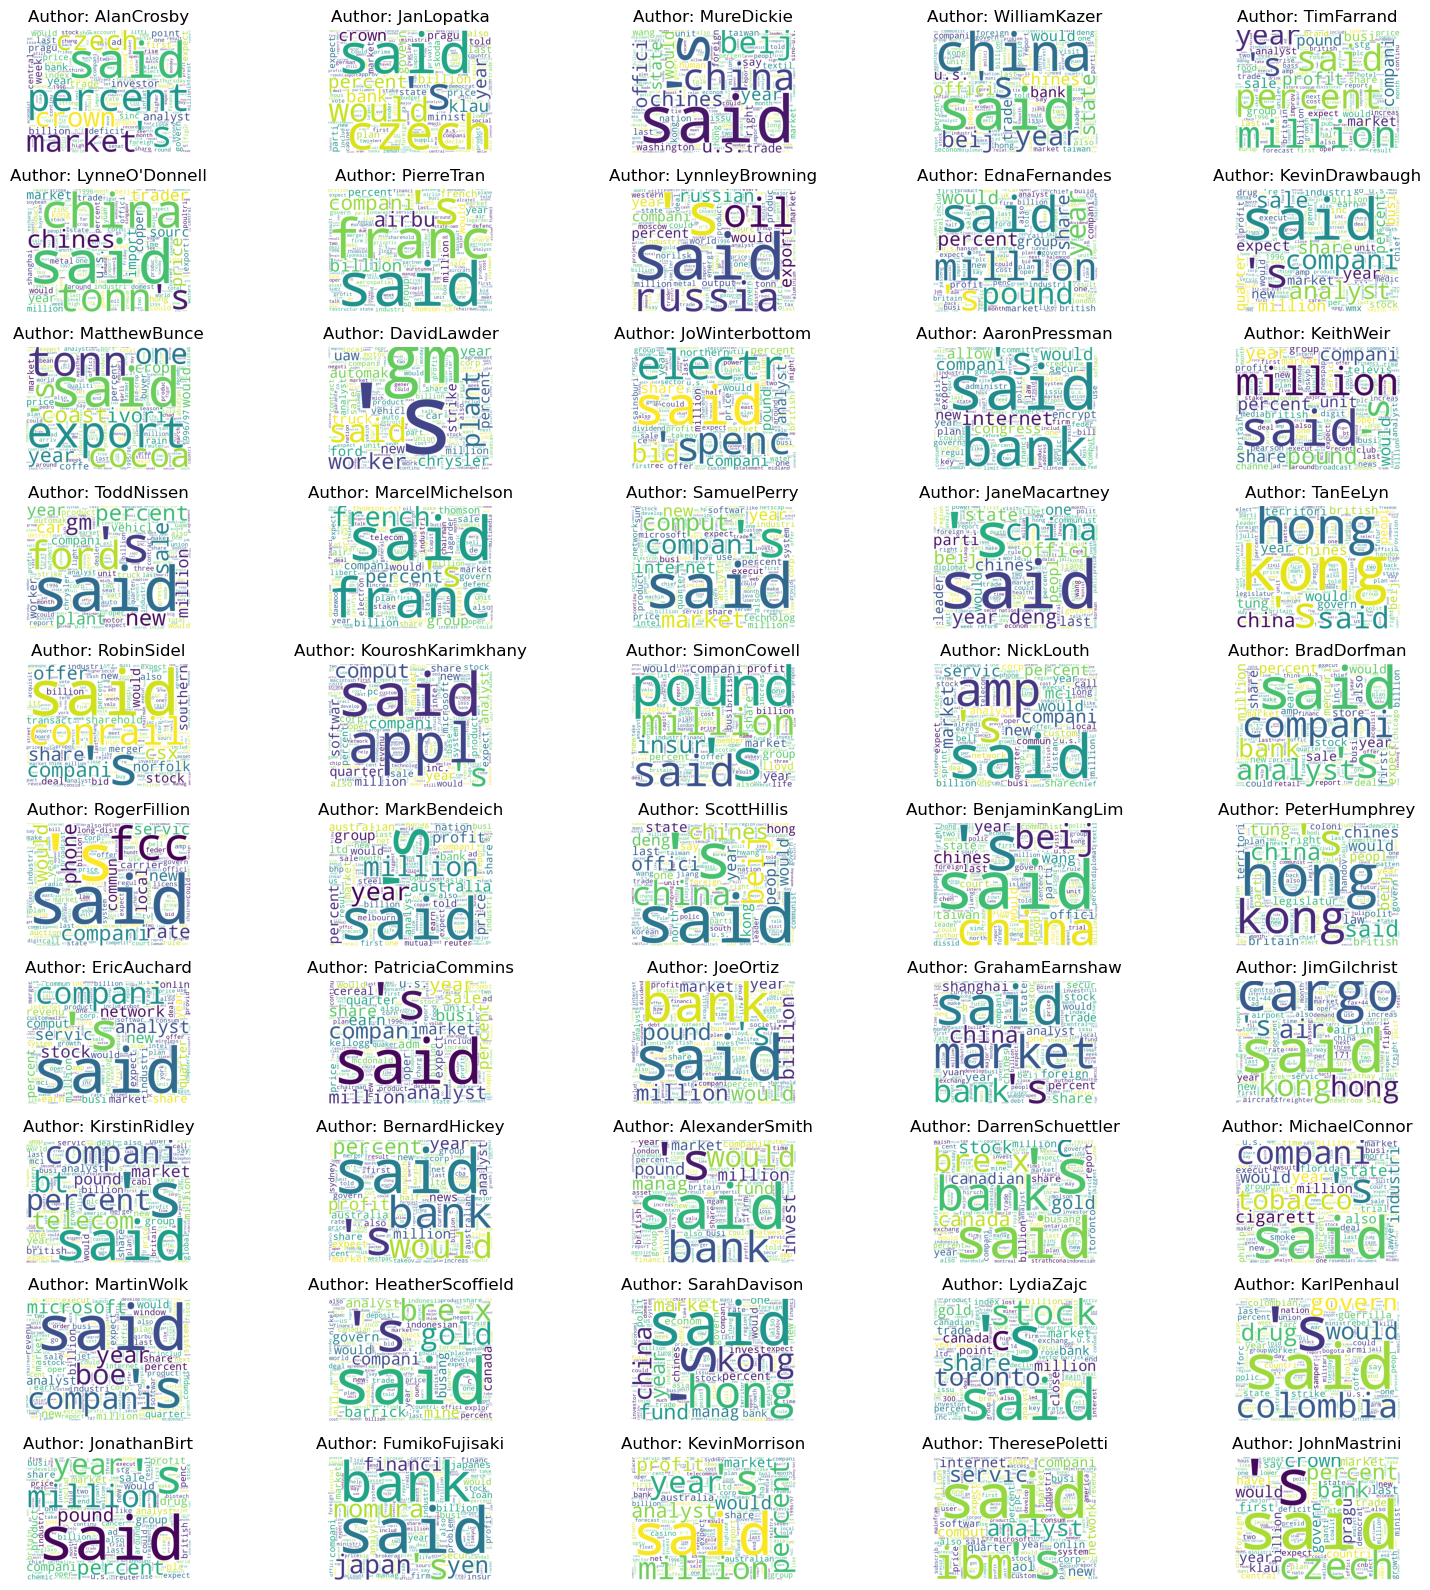

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Set the figure size and layout
fig, axs = plt.subplots(10, 5, figsize=(16, 16))  # Adjust the figsize parameters as desired

# Iterate over each author and create a word cloud
for i, author in enumerate(author_fdist_dict.keys()):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    
    # Create the word cloud for the current author
    fdist = author_fdist_dict[author]
    wordcloud = WordCloud(width=800, height=600, background_color='white', stopwords=None, min_font_size=10).generate_from_frequencies(fdist)  # Adjust the width and height of the wordcloud as desired
    
    # Plot the word cloud in the corresponding subplot
    ax.imshow(wordcloud)
    ax.set_title(f"Author: {author}")
    ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Interesting findings to point out:
* William Kazer and Lynne O'Donnell both mention "china" almost as frequently as they use the word "said".
* Fumiko Fujisaki, Joe Ortiz, and Aaron Pressman mention "bank" as frequently as they use the word "said".
* Frequent patterns across authors are prominence of a single country/area (ie. "hong kong", "japan", "colombia", "czech").
* Many authors also focus on quantiative and financial/economic words (ie. "bank", "million", "pounds", "stock").
* This shows that each author has a specialty, but there are larger categories and industries that they belong to.

## Dimension Reduction: PCA and t-SNE

In [10]:
# The CountVectorizer will now use my custom tokenizer/preprocesser
vectorizer = CountVectorizer(tokenizer=preprocess_text, stop_words='english', max_features=25000)
texts_dtm = vectorizer.fit_transform(texts) # Create a document-term matrix (DTM) which holds the word counts per document
texts_dtm[:2]

<2x25000 sparse matrix of type '<class 'numpy.int64'>'
	with 474 stored elements in Compressed Sparse Row format>

Plotting the relationship between the number of components in PCA and the explained variance, we choose n_components of 1500 at this stage because of the explained variance at around 0.9.

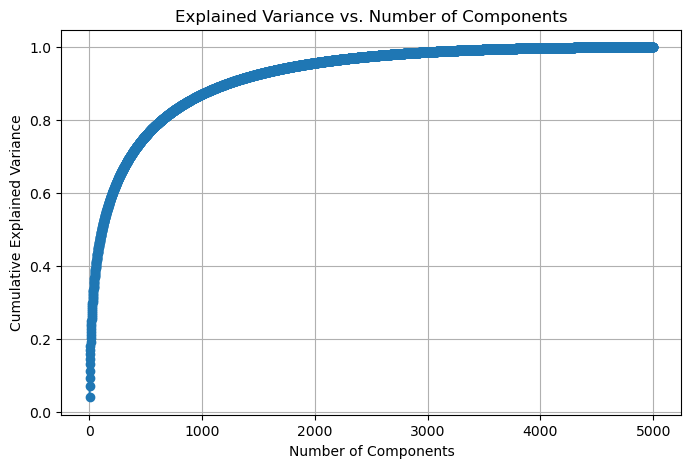

In [30]:
from sklearn.decomposition import PCA

# Fit PCA on the data
pca = PCA()
pca.fit(texts_dtm.toarray())

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

The Cumulative Explained Variance reaches 90% at around 1500, so we will use 1500 components moving forward to make the data more manageable. This will keep that top 1500 components that capture the greatest amount of variance in the data.

## K-Means Clustering

### Find a optimal number of clusters
#### Based on accuracy

In [32]:
from sklearn.cluster import KMeans
import pandas as pd

def measure_accuracy(cluster_assignments, labels):
    # Create a DataFrame with the cluster assignments and the true labels
    df = pd.DataFrame({'cluster': cluster_assignments, 'author': labels})
    
    # Get the majority class in each cluster
    majority_class = df.groupby('cluster')['author'].agg(lambda x: x.value_counts().index[0]).reset_index()
    
    # Merge the majority class back into the DataFrame
    df = pd.merge(df, majority_class, on='cluster', suffixes=('', '_majority'))
    
    # Check if the majority class is equal to the true class
    df['correct'] = df['author'] == df['author_majority']
    
    # Calculate the accuracy
    accuracy = df['correct'].mean()
    
    return accuracy

In [35]:
# List to store the results
accuracy_results = []

# Loop over the values of j
for j in range(1, 2000, 50):
    # Fit KMeans model
    model = KMeans(n_clusters=j, random_state=1)
    model.fit(texts_dtm)
    
    # Get the cluster labels
    cluster_labels = model.labels_
    
    # Measure the accuracy using the custom function
    accuracy = measure_accuracy(cluster_labels, labels)
    
    # Store the results
    accuracy_results.append((j, accuracy))
    
    print(f"Number of Clusters (j): {j}, Clustering Accuracy: {accuracy * 100:.2f}%")

# Convert the results to a DataFrame
accuracy_df = pd.DataFrame(accuracy_results, columns=['Number of Clusters', 'Accuracy'])

Number of Clusters (j): 1, Clustering Accuracy: 2.00%
Number of Clusters (j): 51, Clustering Accuracy: 29.84%
Number of Clusters (j): 101, Clustering Accuracy: 39.08%
Number of Clusters (j): 151, Clustering Accuracy: 43.96%
Number of Clusters (j): 201, Clustering Accuracy: 48.48%
Number of Clusters (j): 251, Clustering Accuracy: 51.82%
Number of Clusters (j): 301, Clustering Accuracy: 54.12%
Number of Clusters (j): 351, Clustering Accuracy: 55.28%
Number of Clusters (j): 401, Clustering Accuracy: 56.68%
Number of Clusters (j): 451, Clustering Accuracy: 57.98%
Number of Clusters (j): 501, Clustering Accuracy: 59.48%
Number of Clusters (j): 551, Clustering Accuracy: 60.38%
Number of Clusters (j): 601, Clustering Accuracy: 62.12%
Number of Clusters (j): 651, Clustering Accuracy: 63.46%
Number of Clusters (j): 701, Clustering Accuracy: 64.12%
Number of Clusters (j): 751, Clustering Accuracy: 65.48%
Number of Clusters (j): 801, Clustering Accuracy: 66.40%
Number of Clusters (j): 851, Cluste

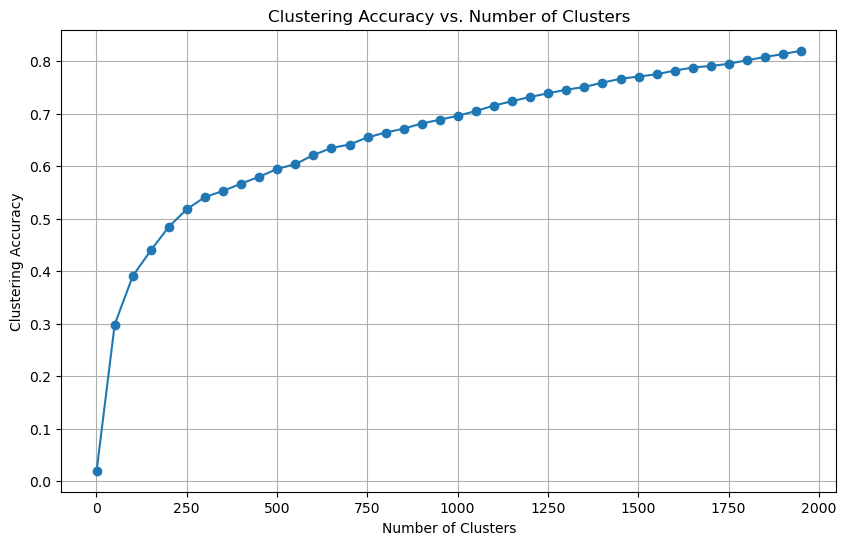

In [37]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(accuracy_df['Number of Clusters'], accuracy_df['Accuracy'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Accuracy')
plt.title('Clustering Accuracy vs. Number of Clusters')
plt.grid(True)
plt.show()

At 100 clusters, the incremental increase in clustering accuracy slows.

At 200 clusters, the incremental increase in clustering accuracy flattens.

#### Based on Silhouette and Sum of Distance 

In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import random

pca = PCA(n_components=1500)
reduced_data_pca = pca.fit_transform(texts_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

In [39]:
from sklearn.metrics import silhouette_score

sum_of_distances = {}
silhouette_scores = {}
for num_clusters in range(1,200,2):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tsne_results)
    sum_of_distances[num_clusters] = kmeans.inertia_
    if num_clusters > 1:
        silhouette_scores[num_clusters] = silhouette_score(tsne_results, kmeans.labels_)

Text(0, 0.5, 'Silhouette Score')

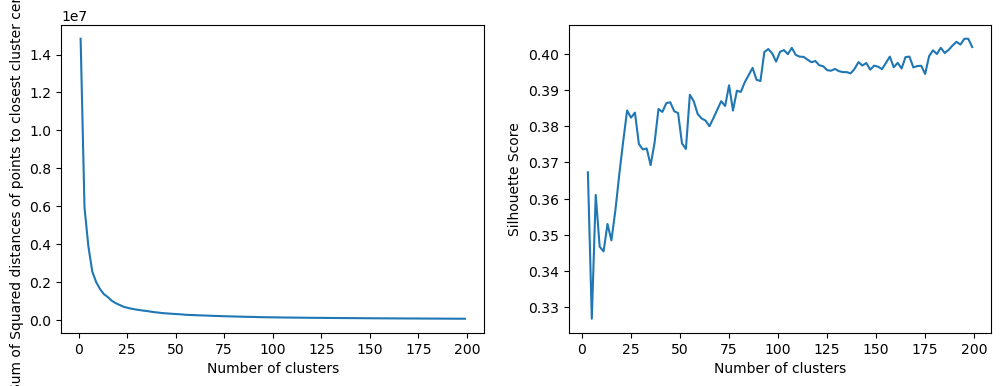

In [40]:
# Create two plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
pd.Series(sum_of_distances).sort_index().plot()
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared distances of points to closest cluster centers')
plt.subplot(1, 2, 2)
pd.Series(silhouette_scores).sort_index().plot()
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

The sharpest improvement on both is at around 20-30 clusters.

However, with the Silhouette Score, the score begins to flatten around 100 clusters, similar to the accuracy plot. 

This indicates that 100 is a good enough clustering threshold, and we will use this moving forward.

#### Visualize the clusters based on the t-SNE results
All authors and 10 randomly-selected unique authors:

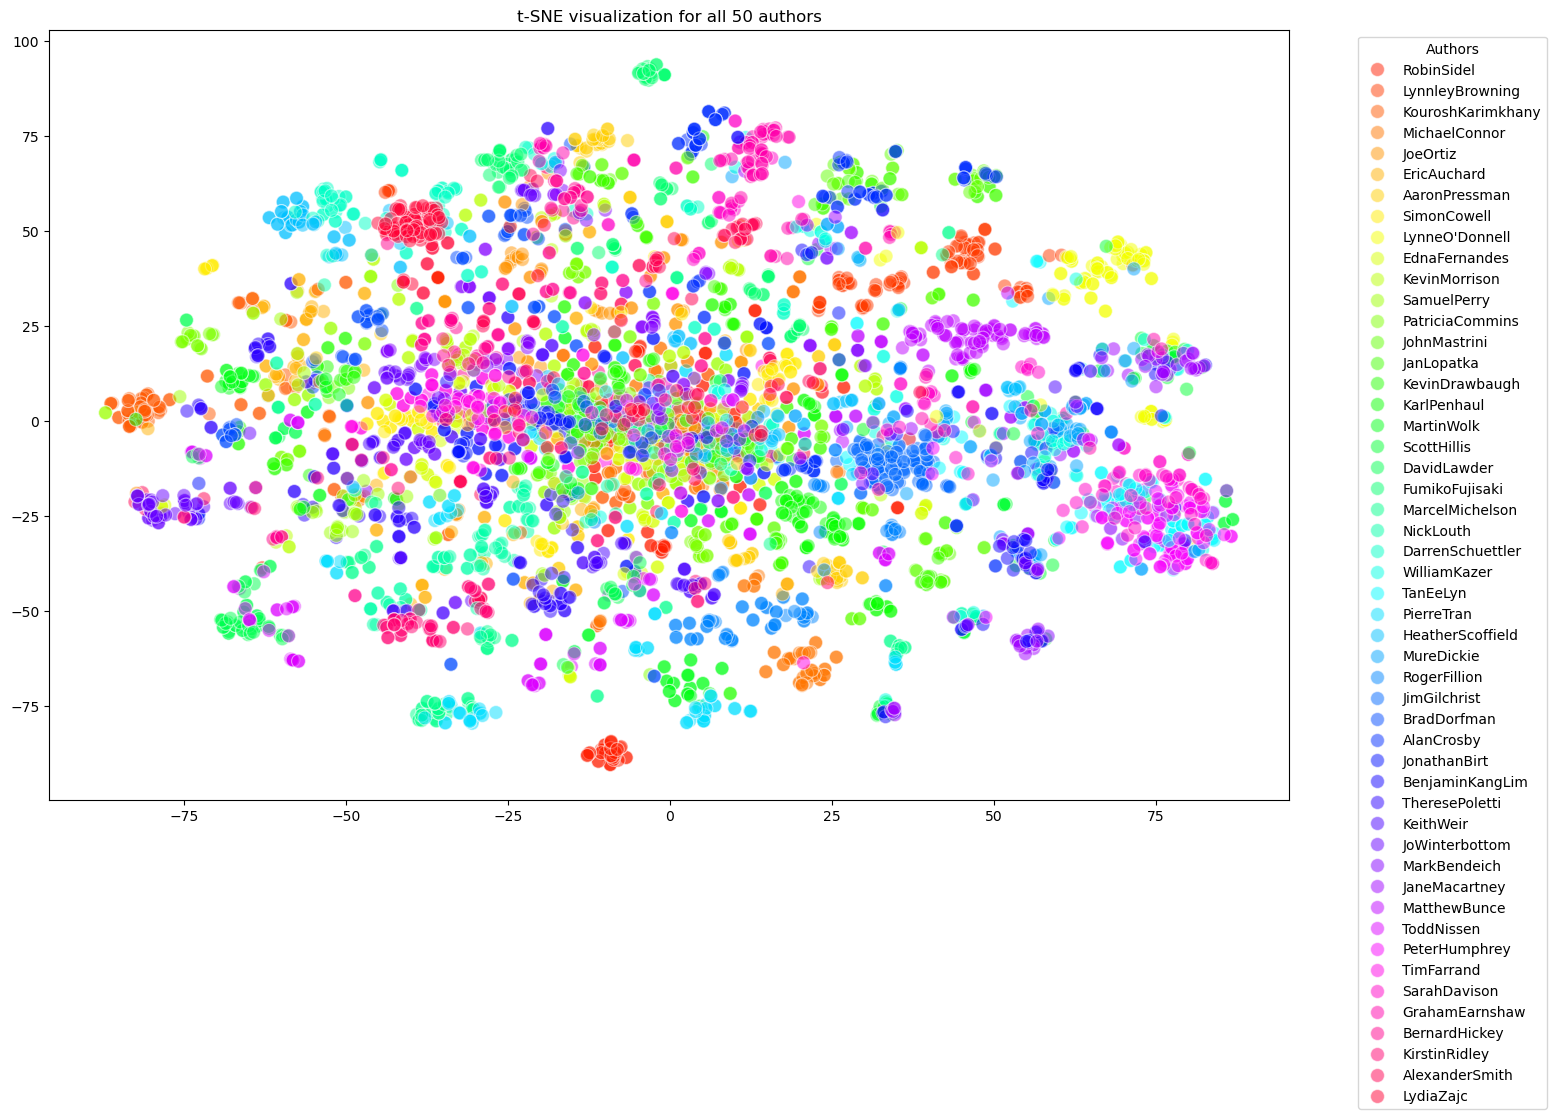

In [12]:
#on all authors
unique_authors = list(set(labels))

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=sns.color_palette("hsv", len(unique_authors)),
    alpha=0.5,
    s=100
)
plt.title('t-SNE visualization for all 50 authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

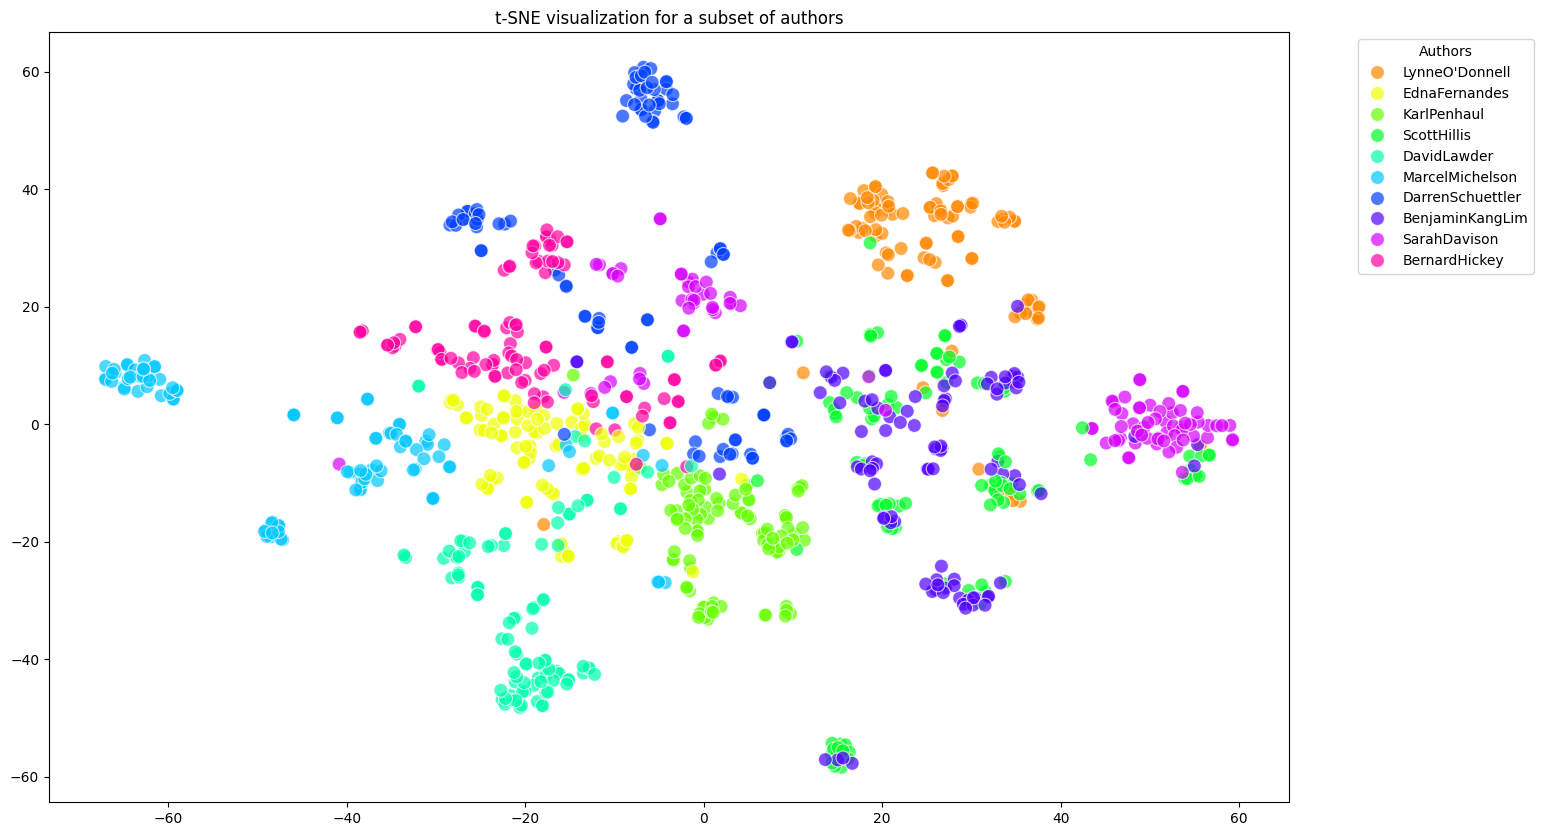

In [ ]:
# Choose a subset of 10 authors
random.seed(42)
unique_authors = list(set(labels))
selected_authors = random.sample(unique_authors, 10)

filtered_indices = [i for i, label in enumerate(labels) if label in selected_authors]
filtered_texts = [texts[i] for i in filtered_indices]
filtered_labels = [labels[i] for i in filtered_indices]
filtered_tfidf = texts[filtered_indices]

# Plot
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=selected_authors,
    palette=sns.color_palette("hsv", len(selected_authors)),
    alpha=0.7,
    s=100
)
plt.title('t-SNE visualization for a subset of authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

There seems to be clustering around the edge with a cloud in the middle. Each author has around 3-4 clusters that can capture a majority of their articles, as is seen with Marcel Michelsen. Further graphs below.

#### Fit Kmeans model on the PCA and t-SNE data and calculate accuracy

In [80]:
unique_authors = list(set(labels))

labels_df = pd.DataFrame(labels, columns=['author'])
labels_df.columns = ['author']

num_clusters = 100

# Reduce the dimensionality of the data using PCA and t-SNE
pca = PCA(n_components=1500)
reduced_data_pca = pca.fit_transform(texts_dtm.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# Run K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=1000, random_state=42)
labels_df['pca'] = kmeans.fit_predict(reduced_data_pca)

quality_counts = labels_df.groupby(['author', 'pca']).size().reset_index(name='count')
quality_counts
max_quality_per_cluster = quality_counts.loc[quality_counts.groupby('pca')['count'].idxmax()]
print(max_quality_per_cluster)
cluster_map = max_quality_per_cluster.set_index('pca')['author'].to_dict()
cluster_map

# Map clusters to authors
labels_df['predicted_pca'] = labels_df['pca'].map(cluster_map)

# Calculate accuracy
accuracy = np.mean(labels_df['predicted_pca'] == labels_df['author'])
print(f'Accuracy: {accuracy}')

                author  pca  count
267          KeithWeir    0     19
268          KeithWeir    1     26
166   HeatherScoffield    2     12
261        KarlPenhaul    3     14
333     LynneO'Donnell    4      8
..                 ...  ...    ...
10       AaronPressman   95      3
324  KouroshKarimkhany   96      8
406      MichaelConnor   97     45
502        SamuelPerry   98     44
35      AlexanderSmith   99     10

[100 rows x 3 columns]
Accuracy: 0.4164


The above table shows the number of articles in each PCA cluster, as identified by the majority author in each cluster. The accuracy is 0.4164, which means that on average, 41.64% of the articles in each cluster are grouped correctly with other articles by their author.

In [81]:
unique_authors = list(set(labels))

labels_df = pd.DataFrame(labels, columns=['author'])
labels_df.columns = ['author']

num_clusters = 100

# Run K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=1000, random_state=42)
labels_df['tsne'] = kmeans.fit_predict(tsne_results)

quality_counts = labels_df.groupby(['author', 'tsne']).size().reset_index(name='count')
quality_counts
max_quality_per_cluster = quality_counts.loc[quality_counts.groupby('tsne')['count'].idxmax()]
print(max_quality_per_cluster)
cluster_map = max_quality_per_cluster.set_index('tsne')['author'].to_dict()
cluster_map

# Map clusters to wine quality
labels_df['predicted_tsne'] = labels_df['tsne'].map(cluster_map)

# Calculate accuracy
accuracy = np.mean(labels_df['predicted_tsne'] == labels_df['author'])
print(f'Accuracy: {accuracy}')

labels_df = labels_df.drop(columns=['tsne', 'predicted_tsne'])

              author  tsne  count
0      AaronPressman     0     22
645       PierreTran     1     11
139      DavidLawder     2      8
575       MureDickie     3     13
194   FumikoFujisaki     4     29
..               ...   ...    ...
126      BradDorfman    95     10
354     JonathanBirt    96     15
381        KeithWeir    97      7
81   BenjaminKangLim    98     13
224   GrahamEarnshaw    99     24

[100 rows x 3 columns]
Accuracy: 0.4248


The above table shows the number of articles in each tSNE cluster, as identified by the majority author in each cluster. The accuracy is 0.4248, which means that on average, 42.48% of the articles in each cluster are grouped correctly with other articles by their author.

Note that the accuracy is increasing for the t-SNE compared to the model ran on PCA which had 1500 components. t-SNE was able to capture more meaningful patterns in the text data, which suggests there are important non-linear trends in the data.

## Run on TF-IDF with Dimension Reduction

#### Transform the text data using the TfidfVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(lowercase=True,
                             stop_words='english',
                             ngram_range=(1,1),
                            #  tokenizer = tokenizer.tokenize
                            tokenizer=preprocess_text
                            )
vectors = vectorizer.fit_transform(train_texts)
vectors.shape

(2500, 28009)

#### Find the top 10 topics using LDA

In [52]:
from sklearn.decomposition import TruncatedSVD

# Define the number of topics or components
num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(vectors)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T

In [53]:
# Print the topics with their terms
terms  = vectorizer.get_feature_names_out()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['said', "'s", 'bank', 'percent', 'china', 'million', 'compani', 'year', 'market', 'analyst']
Topic 1:  ['kong', 'hong', 'china', 'beij', 'chines', 'tung', 'wang', 'legislatur', 'taiwan', 'coloni']
Topic 2:  ['gm', 'plant', 'worker', 'uaw', 'strike', 'automak', 'ford', 'truck', 'auto', 'union']
Topic 3:  ['bank', 'c', 'gold', 'gm', 'toronto', 'canada', 'bre-x', 'canadian', 'loan', 'stock']
Topic 4:  ['wang', 'china', 'beij', 'dissid', 'state', 'export', 'trial', 'taiwan', 'human', 'chines']
Topic 5:  ['mci', 'bt', 'telecom', 'franc', 'deal', 'british', 'merger', 'amp', 'pound', 'u.s.']
Topic 6:  ['bre-x', 'gold', 'c', 'barrick', 'toronto', 'busang', 'indonesian', 'mci', 'stock', 'bt']
Topic 7:  ['bank', 'internet', 'comput', 'softwar', 'microsoft', 'appl', 'servic', 'mci', 'wang', 'network']
Topic 8:  ['wang', 'pound', 'profit', 'dissid', 'million', 'trial', 'penc', 'court', 'sentenc', 'dan']
Topic 9:  ['franc', 'airbu', 'air', 'boe', 'airlin', 'french', 'thomson', 'libert', 

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    tokenizer=preprocess_text,
    max_df = 0.99,
    min_df = 0.01,
    stop_words="english",
)

X_tfidf = vectorizer.fit_transform(texts)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 5000, n_features: 2719


max_df: This parameter sets an upper threshold for the document frequency. Terms that appear in a higher proportion of documents than this threshold are excluded from the vocabulary. In this case, with max_df=0.99, any term that appears in more than 99% of the documents will be ignored. This is typically used to remove very common words that are not informative (e.g., "the", "and").

min_df: This parameter sets a lower threshold for the document frequency. Terms that appear in fewer documents than this threshold are excluded from the vocabulary. With min_df=0.01, any term that appears in less than 1% of the documents will be ignored. This helps in filtering out very rare words that might not be relevant.

#### Run KMeans on TF-IDF data (after dimension reduction) and calculate accuracy

In [85]:
unique_authors = list(set(labels))

labels_df = pd.DataFrame(labels, columns=['author'])
labels_df.columns = ['author']

# From the plot of the silhouette scores, we can see that the silhouette score 
# increases slightly when the number of clusters is 21
num_clusters = 100

# Reduce the dimensionality of the data using PCA and t-SNE
pca = PCA(n_components=1500)
reduced_data_pca = pca.fit_transform(X_tfidf.toarray())  # Convert sparse matrix to dense matrix
tsne = TSNE(n_components=2, perplexity=20)
tsne_results = tsne.fit_transform(reduced_data_pca)

# Run K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=1000, random_state=42)
labels_df['pca'] = kmeans.fit_predict(reduced_data_pca)

quality_counts = labels_df.groupby(['author', 'pca']).size().reset_index(name='count')
quality_counts
max_quality_per_cluster = quality_counts.loc[quality_counts.groupby('pca')['count'].idxmax()]
print(max_quality_per_cluster)
cluster_map = max_quality_per_cluster.set_index('pca')['author'].to_dict()
cluster_map

# Map clusters to wine quality
labels_df['predicted_pca'] = labels_df['pca'].map(cluster_map)

# Calculate accuracy
accuracy = np.mean(labels_df['predicted_pca'] == labels_df['author'])
print(f'Accuracy: {accuracy}')

labels_df = labels_df.drop(columns=['pca', 'predicted_pca'])

               author  pca  count
501        RobinSidel    0      7
350   LynnleyBrowning    1     13
80   DarrenSchuettler    2     17
191      JimGilchrist    3     62
515      RogerFillion    4     39
..                ...  ...    ...
553      SarahDavison   95     20
348    LynneO'Donnell   96      8
194      JimGilchrist   97     36
152    GrahamEarnshaw   98     36
222          JoeOrtiz   99     19

[100 rows x 3 columns]
Accuracy: 0.4842


The above table shows the number of articles in each TF-IDF transformed PCA cluster, as identified by the majority author in each cluster. The accuracy is 0.4842, which means that on average, 48.42% of the articles in each cluster are grouped correctly with other articles by their author.

In [100]:
unique_authors = list(set(labels))

labels_df = pd.DataFrame(labels, columns=['author'])
labels_df.columns = ['author']

# From the plot of the silhouette scores, we can see that the silhouette score 
# increases slightly when the number of clusters is 21
num_clusters = 100

# Run K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=1000, random_state=42)
labels_df['tsne'] = kmeans.fit_predict(tsne_results)

quality_counts = labels_df.groupby(['author', 'tsne']).size().reset_index(name='count')
quality_counts
max_quality_per_cluster = quality_counts.loc[quality_counts.groupby('tsne')['count'].idxmax()]
print(max_quality_per_cluster)
cluster_map = max_quality_per_cluster.set_index('tsne')['author'].to_dict()
cluster_map

# Map clusters to wine quality
labels_df['predicted_tsne'] = labels_df['tsne'].map(cluster_map)

# Calculate accuracy
accuracy = np.mean(labels_df['predicted_tsne'] == labels_df['author'])
print(f'Accuracy: {accuracy}')

labels_df = labels_df.drop(columns=['tsne', 'predicted_tsne'])

              author  tsne  count
644      SimonCowell     0     25
393   LynneO'Donnell     1     13
394   LynneO'Donnell     2     25
413  MarcelMichelson     3     12
587     RogerFillion     4     19
..               ...   ...    ...
474     MatthewBunce    95     20
55   BenjaminKangLim    96     11
730     WilliamKazer    97      8
104      BradDorfman    98     13
211       JanLopatka    99      8

[100 rows x 3 columns]
Accuracy: 0.5176


The above table shows the number of articles in each TF-IDF transformed t-SNE cluster, as identified by the majority author in each cluster. The accuracy is 0.5176, which means that on average, 51.76% of the articles in each cluster are grouped correctly with other articles by their author.

## Final Results

### Accuracy
|  | With TF-IDF    | Without TF-IDF   |
|------------|-------------|-------------|
| PCA     | 0.4842 | 0.4146 | 
| t-SNE     | 0.5176 | 0.4248 |

**The TF-IDF t-SNE model is the best based on the highest accuracy.**

### Visualize the Best Model

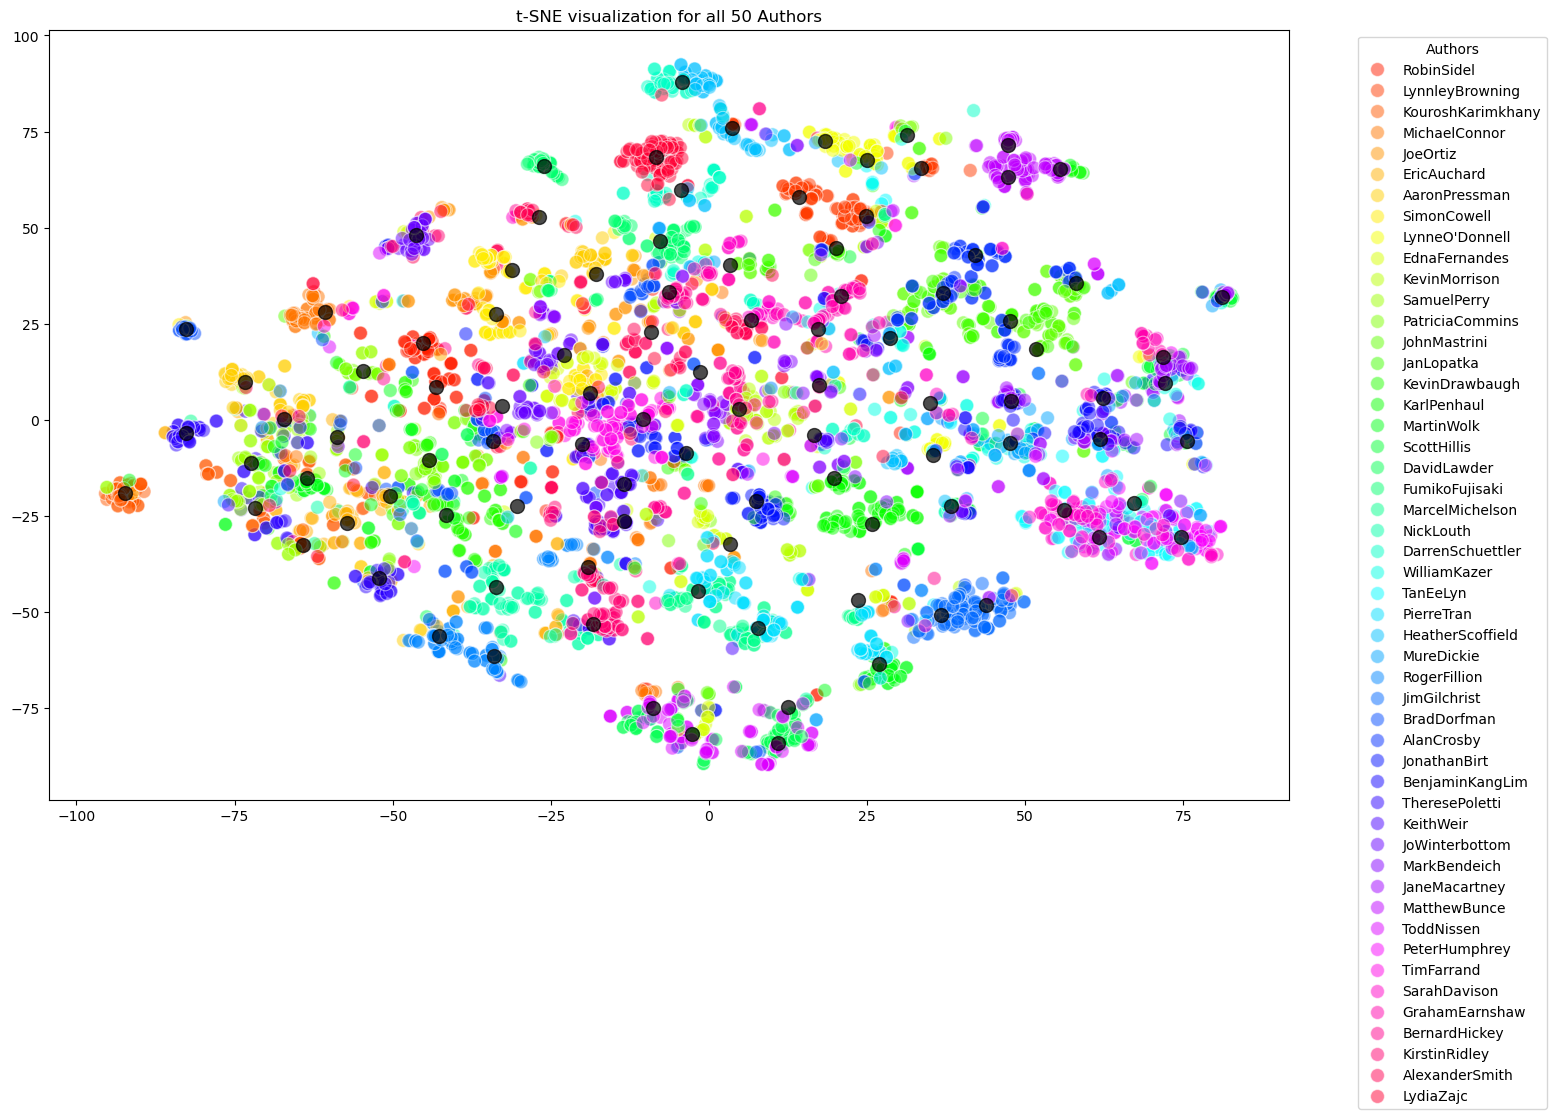

In [103]:
unique_authors = list(set(labels))

plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=labels,
    palette=sns.color_palette("hsv", len(unique_authors)),
    alpha=0.5,
    s=100
)

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.7)

plt.title('t-SNE visualization for all 50 Authors')
plt.legend(title='Authors', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Interesting findings from the final plot:
* **Multiple Centroids per Author**
    * Even within a visually similar cluster of one author, there can be 2 centroids. As clusters of 100 performed better than clusters of 50 (the number of authors), we can assume that these 2 centroids are better capturing a variability in the writing style that otherwise seems similar. This variability within an author's work might reflect different topics, tones, or contexts in which the author writes.
* **Central Cloud**
    * Even with TF-IDF weights, there is still a large cloud of authors in the center. This likely represents common topics like the economy and reporter lingo like "said" and "'s" (as observed from the previous word cloud). TF-IDF is designed to downweight common words, but in a domain like journalism, certain terms are ubiquitous and may still dominate the central cluster because they are essential to the content, regardless of the author.
* **Overlap Between Authors**
    * Although there are more distinct clusters along the edges of the cloud. there is still overlap between authors. This shows that it is difficult to be unique and distinguish yourself from the rest of the industry, as is the case in the creative industry. This may be due to pressure to conform to stylistic norms or to cover similar topics.
* **Less Distinction Between Clusters After TF-IDF Transformation**
    * As compared to the non-TF-IDF-transformed data, there is overall less distinction between clusters in the graph. This suggests that there may be common words that distinguish between broader topics and industries that was downweighted by TF-IDF. However, the overall accuracy improves with the TF-IDF transformation, suggesting that the micro-patterns of each individual author are still captured more accurately, despite the loss in distinction between macro-level groups (industries, companies, etc.)

## Conclusion:
The analysis of the Reuters corpus demonstrated that while some authors exhibit distinct patterns in their writing — likely due to consistent topics or stylistic choices — others are more variable, leading to less distinct clustering. The use of TF-IDF for text representation, combined with dimensionality reduction techniques like PCA and t-SNE, allowed for the effective exploration of these patterns. The comparison between clustering in PCA and t-SNE spaces revealed that the latter often captures more meaningful relationships in the text data, leading to better clustering results. This implies that PCA was unable to capture important non-linear trends in the data, which t-SNE captured.

Overall, this project highlights the potential for text clustering to uncover meaningful patterns in large textual datasets, providing insights into the distinct characteristics of individual authors' works. The application of TF-IDF and t-SNE was particularly crucial in this process, as it transformed the raw text into a form that could be effectively analyzed and clustered, enabling us to identify and explore the unique styles and themes present in the corpus.